<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/wine_classification_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 데이터의 파악

- 레드 와인: 1,599개의 샘플
- 화이트 와인: 4,898개의 샘플

변수(Attributes): 총 12개의 변수로 이루어져 있으며, 11개의 입력 변수와 1개의 출력 변수가 있습니다.
입력 변수(물리화학적 특성):

고정산도(fixed acidity)

휘발성 산도(volatile acidity)

구연산(citric acid)

잔여 설탕(residual sugar)

염화물(chlorides)

유리 아황산염(free sulfur dioxide)

총 아황산염(total sulfur dioxide)

밀도(density)

pH

황산염(sulphates)

알코올(alcohol)

출력 변수(관능 데이터):
12. 품질(quality): 와인 전문가 3명 이상이 0점(매우 나쁨)에서 10점(매우 훌륭함) 사이로 평가한 점수의 중앙값

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 데이터 불러오기
wine = pd.read_csv("/content/sample_data/winequality-white.csv", sep=';')
display(wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
# 'quality' 열을 기준으로 라벨링
# pd.cut 함수를 사용하여 범주형 변수를 생성합니다.
bins = [0, 4, 6, 10]
labels = ['Bad', 'Normal', 'Good']
wine['quality_label'] = pd.cut(wine['quality'], bins=bins, labels=labels, include_lowest=True)
display(wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Normal


In [26]:
# 데이터 분리
from sklearn.model_selection import train_test_split

filtered_wine = wine[wine['quality_label'].isin(['Bad', 'Good'])]
features = filtered_wine.drop(['quality', 'quality_label'], axis=1)
target = filtered_wine['quality_label']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# 1. 데이터프레임의 결측치 개수 확인
print("결측치 개수 확인")
print(wine.isnull().sum())

# 2. 결측치가 있는 모든 행(row) 제거
# how='any'는 하나라도 결측치가 있으면 행을 제거한다는 의미
wine_cleaned = wine.dropna(how='any')

# 3. 결측치 제거 후 데이터프레임의 크기 확인
print("\n결측치 제거 전/후 데이터 크기")
print(f"제거 전 데이터 크기: {wine.shape}")
print(f"제거 후 데이터 크기: {wine_cleaned.shape}")

# (선택 사항) 결측치 제거 후 다시 확인
print("\n 결측치 제거 후 결측치 개수 확인 ")
print(wine_cleaned.isnull().sum())

결측치 개수 확인
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

결측치 제거 전/후 데이터 크기
제거 전 데이터 크기: (4898, 13)
제거 후 데이터 크기: (4898, 13)

 결측치 제거 후 결측치 개수 확인 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64


# K- NN

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:

# n_neighbors=5는 가장 가까운 5개의 이웃을 참고하겠다는 의미
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)


print("K-NN 분류 모델 평가 결과")
print(f"K-NN 모델의 정확도: {accuracy:.4f}")

K-NN 분류 모델 평가 결과
K-NN 모델의 정확도: 0.9478


# 결정 트리

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

결정 트리 분류 모델 평가 결과
결정 트리 모델의 정확도: 0.9157

결정 트리는 모델의 의사결정 과정을 시각적으로 확인할 수 있는 장점이 있습니다.


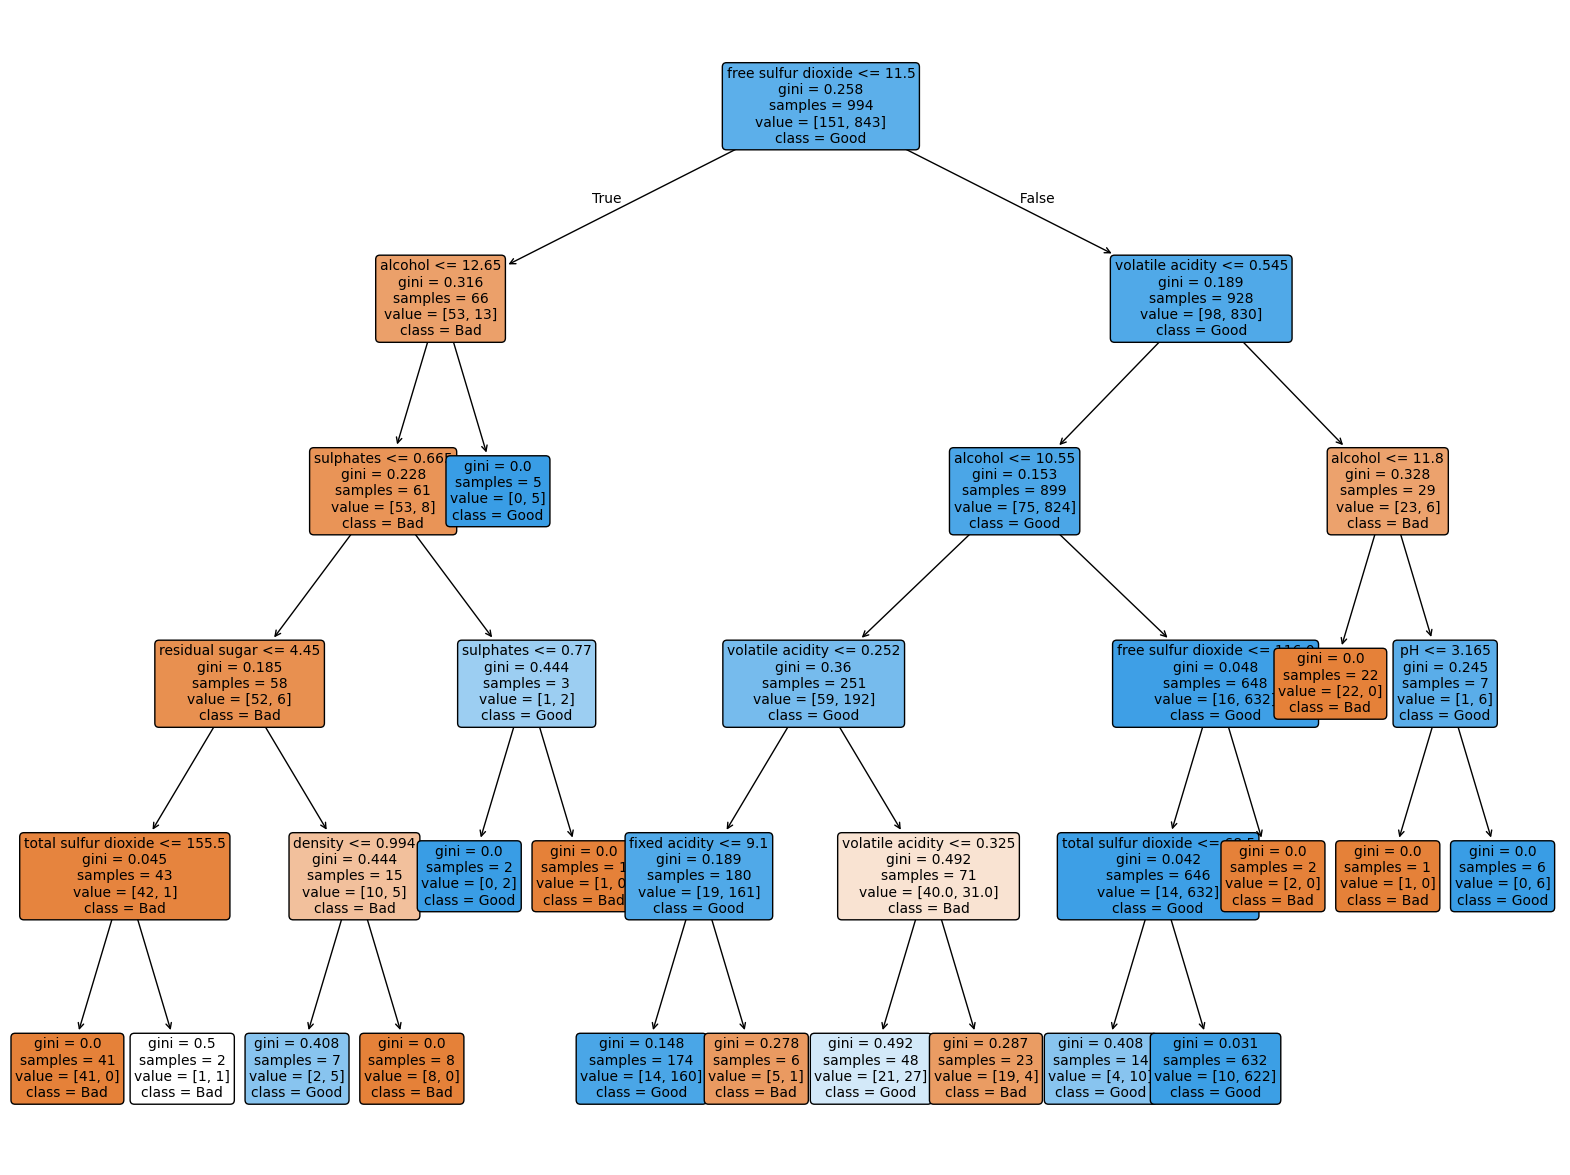

In [32]:
# max_depth는 트리의 깊이를 제한 => 과적합 방지
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# 예측 및 평가
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("결정 트리 분류 모델 평가 결과")
print(f"결정 트리 모델의 정확도: {accuracy:.4f}")
print("\n결정 트리는 모델의 의사결정 과정을 시각적으로 확인할 수 있는 장점이 있습니다.")

# (선택사항) 결정 트리 시각화
plt.figure(figsize=(20,15))
plot_tree(dtree, filled=True, feature_names=features.columns, class_names=['Bad', 'Good'], rounded=True, fontsize=10)
plt.show()

# 로지스틱 회귀

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000) # 수렴을 위해 max_iter를 충분히 크게 설정
model.fit(X_train, y_train)

# 기울기(Coefficients)
# 각 변수(features)에 대한 가중치를 나타냅니다.
print("\n- 기울기(Coefficients):")
for feature, coef in zip(features.columns, model.coef_[0]):
    print(f"  {feature:<20}: {coef:.4f}")

# 절편(Intercept)
print(f"\n- 절편(Intercept)        : {model.intercept_[0]:.4f}")
# 모델의 정확도 평가 (선택 사항)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n- 테스트 정확도         : {accuracy:.4f}")


- 기울기(Coefficients):
  fixed acidity       : -0.4074
  volatile acidity    : -5.7275
  citric acid         : 0.1275
  residual sugar      : 0.1896
  chlorides           : -0.2385
  free sulfur dioxide : 0.0280
  total sulfur dioxide: -0.0054
  density             : -0.0447
  pH                  : 0.5385
  sulphates           : 1.2372
  alcohol             : 1.2132

- 절편(Intercept)        : -10.3751

- 테스트 정확도         : 0.9277


# 랜덤 포레스트

In [34]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [35]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 모델 학습
# n_estimators는 생성할 결정 트리의 개수입니다.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("랜덤 포레스트 분류 모델 평가 결과")
print(f"랜덤 포레스트 모델의 정확도: {accuracy:.4f}")

랜덤 포레스트 분류 모델 평가 결과
랜덤 포레스트 모델의 정확도: 0.9639


특성 중요도 (Feature Importance)


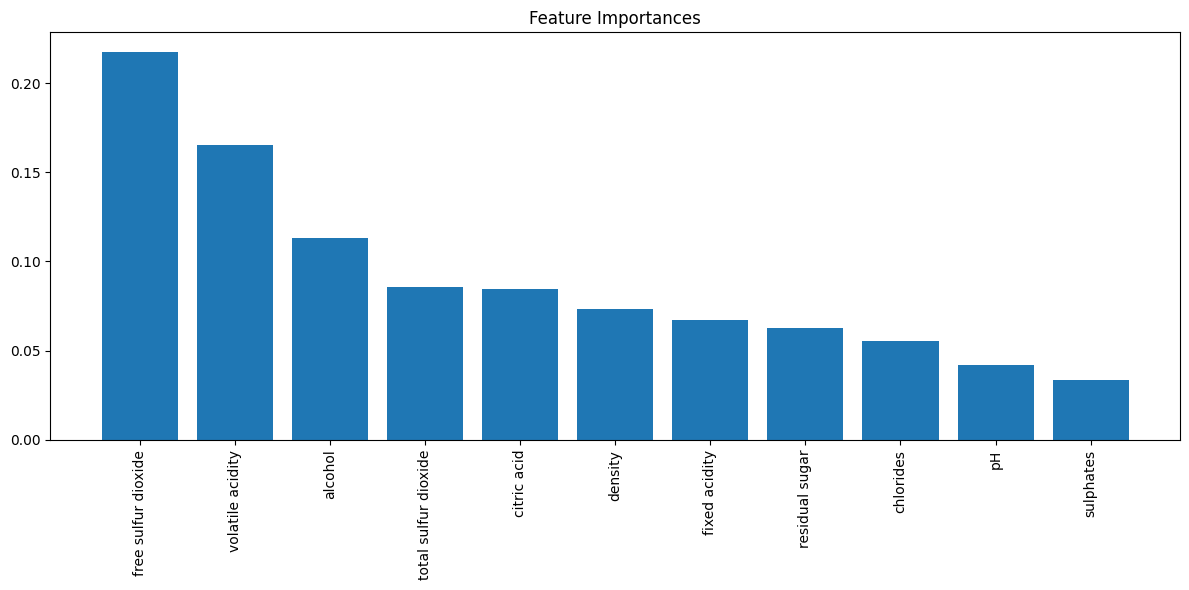

In [36]:
# 시각화

# 특성 중요도 시각화
print("특성 중요도 (Feature Importance)")
importances = rf_model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# 딥러닝

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 예시 데이터 생성
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [10, 20, 30, 40, 50],
        'target': ['A', 'B', 'A', 'B', 'A']}
df = pd.DataFrame(data)

# 'X'와 'y' 변수 정의
# 'target' 열을 제외한 모든 열을 'X'로 사용
X = df.drop('target', axis=1)
# 'target' 열을 'y'로 사용
y = df['target']

# StandardScaler를 적용하기 전에 X가 Pandas DataFrame이므로 X.values를 미리 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 변환된 데이터를 새로운 변수에 저장하는 것이 일반적

Y = pd.get_dummies(y).values

# train_test_split에 변환된 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [41]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Prepare data for deep learning
# Use filtered_wine which contains 'Bad' and 'Good' quality labels
features_dl = filtered_wine.drop(['quality', 'quality_label'], axis=1)
target_dl = filtered_wine['quality_label']

# One-hot encode the target
target_dl_encoded = pd.get_dummies(target_dl).values

# Scale the features
scaler_dl = StandardScaler()
features_dl_scaled = scaler_dl.fit_transform(features_dl)

# Split data into training and testing sets for deep learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    features_dl_scaled, target_dl_encoded, test_size=0.2, random_state=42
)

# 모델 정의
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_dl.shape[1],)), # 입력층 및 첫 번째 은닉층
    layers.Dropout(0.3), # 과적합 방지
    layers.Dense(64, activation='relu'), # 두 번째 은닉층
    layers.Dropout(0.3), # 과적합 방지
    layers.Dense(y_train_dl.shape[1], activation='softmax') # 출력층 (클래스 수에 맞게 조절)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # 원-핫 인코딩된 라벨에 적합
              metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,987 (39.01 KB)

 Trainable params: 9,987 (39.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6480 - loss: 0.8822 - val_accuracy: 0.8442 - val_loss: 0.4435
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.4377 - val_accuracy: 0.8995 - val_loss: 0.3083
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8887 - loss: 0.3562 - val_accuracy: 0.9246 - val_loss: 0.2566
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.3033 - val_accuracy: 0.9347 - val_loss: 0.2267
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.2838 - val_accuracy: 0.9347 - val_loss: 0.2100
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9014 - loss: 0.2533 - val_accuracy: 0.9347 - val_loss: 0.2008
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9203 - loss: 0.2407 - val_accuracy: 0.9246 - val_loss: 0.1935
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.2015 - val_accuracy: 0.9347 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


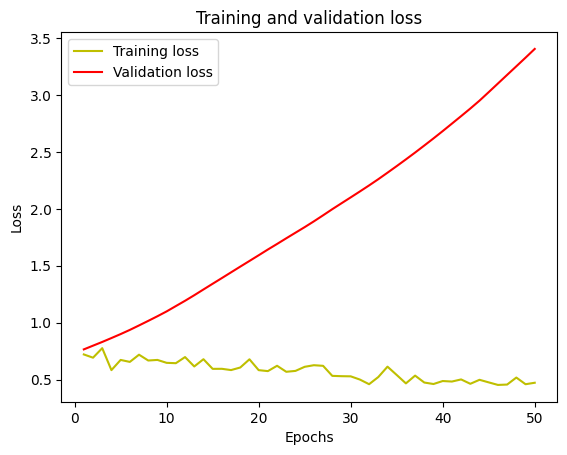

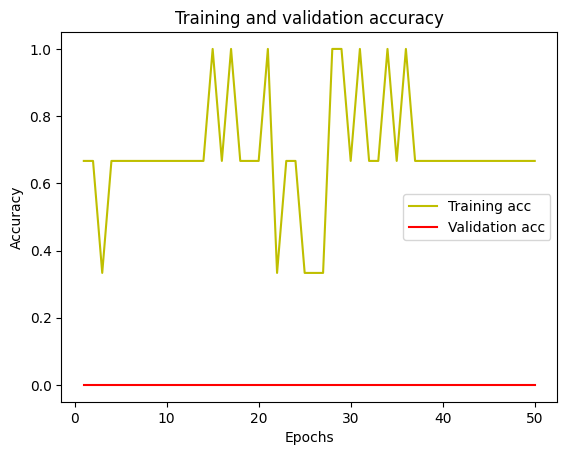

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 1]
 [0 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [40]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss'] # Fix: Added '='
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))